In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotting_functions import *

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [ ]:
# load datasets from CSV to pandas df
# artsists is delimited using ; so use sep=','
artists = pd.read_csv("../datasets/artists.csv", sep=';')
tracks = pd.read_csv("../datasets/tracks.csv")

In [ ]:
## Datasets shape
artists_shape = artists.shape
tracks_shape = tracks.shape
print(f"Artists rows: {artists_shape[0]}, columns: {artists_shape[1]}")
print(f"Tracks  rows: {tracks_shape[0]}, columns: {tracks_shape[1]}")

Artists rows: 104, columns: 14
Tracks  rows: 11166, columns: 45


In [ ]:
## Let's see some row values by using df.head()

In [ ]:
artists.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tracks.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


In [ ]:
############################
# Data quality
# - Missing values (NaN)
# - Duplicate records
# - Data types casting
# - Outliers and anomalie

## Artists
# Check how many NaNs are present and plot the number of NaN per each column
nan_count_artists = artists.isnull().sum()
nan_pct_artists = (nan_count_artists / len(artists)) * 100
non_nan_artists = (artists.notnull().sum() / len(artists)) * 100

plot_data = pd.DataFrame({
    'NaN Values %': nan_pct_artists,
    'NaN Values': nan_count_artists,
    'Non-NaN Values %': non_nan_artists
})

plot_data = plot_data.sort_values(by=['NaN Values'], ascending=False)
plot_data

,NaN Values %,NaN Values,Non-NaN Values %
active_end,100.000000,104,0.000000
active_start,51.923077,54,48.076923
region,34.615385,36,65.384615
province,32.692308,34,67.307692
country,32.692308,34,67.307692
nationality,31.730769,33,68.269231
birth_place,30.769231,32,69.230769
latitude,30.769231,32,69.230769
longitude,30.769231,32,69.230769
birth_date,29.807692,31,70.192308


In [ ]:
plot_data.drop("NaN Values", axis=1, inplace=True)

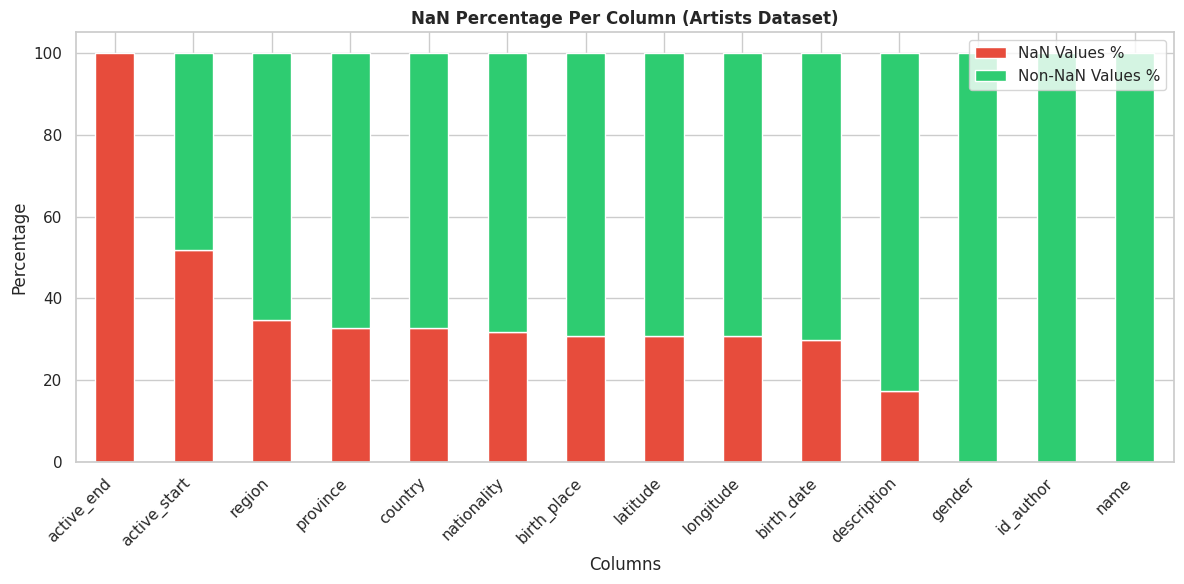

In [ ]:
# stacked bar to see the proportion of NaN vs non NaN in each column for 
ax = plot_data.plot(kind='bar', stacked=True, 
                     figsize=(12, 6),
                     color=['#e74c3c', '#2ecc71'])
ax.set_title('NaN Percentage Per Column (Artists Dataset)', fontsize=12, fontweight='bold')
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Tracks
# Check how many NaNs are present and plot the number of NaN per each column
nan_count_tracks = tracks.isnull().sum()
nan_pct_tracks = (nan_count_tracks / len(tracks)) * 100
non_nan_pct_tracks = (tracks.notnull().sum() / len(tracks)) * 100

plot_data = pd.DataFrame({
    'NaN Values %': nan_pct_tracks,
    'NaN Values': nan_count_tracks,
    'Non-NaN Values %': non_nan_pct_tracks
})

plot_data = plot_data.sort_values(by=['NaN Values'], ascending=False)
plot_data

,NaN Values %,NaN Values,Non-NaN Values %
featured_artists,68.502597,7649,31.497403
stats_pageviews,58.427369,6524,41.572631
album,13.559018,1514,86.440982
day,11.848469,1323,88.151531
month,10.720043,1197,89.279957
year,3.582303,400,96.417697
language,0.940355,105,99.059645
id_album,0.698549,78,99.301451
album_name,0.698549,78,99.301451
album_image,0.698549,78,99.301451


In [ ]:
# plot
plot_data.drop("NaN Values", axis=1, inplace=True)

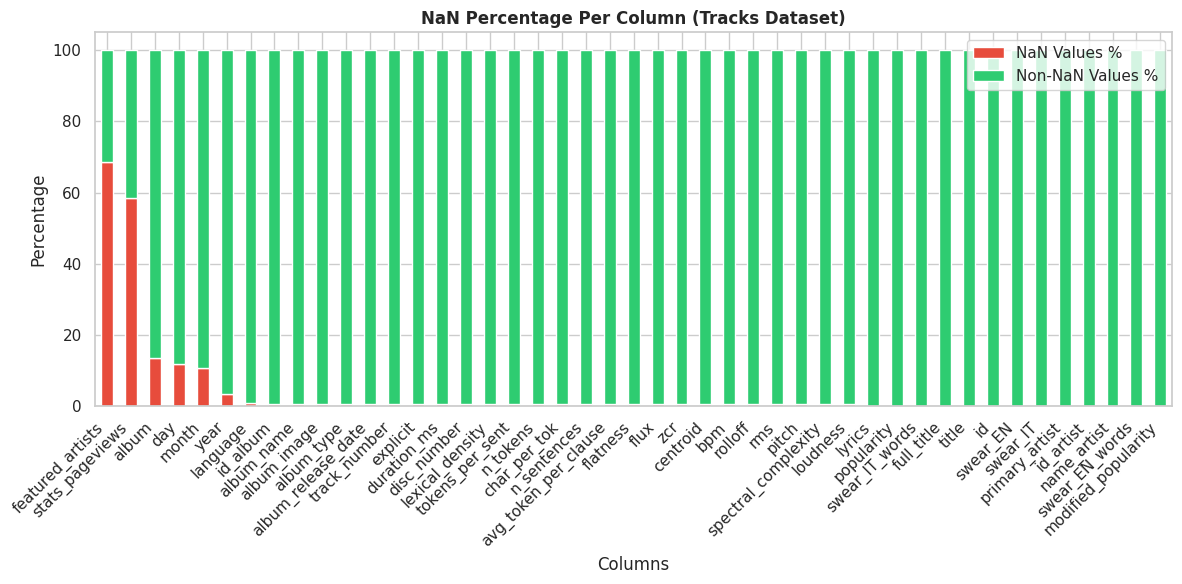

In [ ]:
# stacked bar to see the proportion of NaN vs non NaN in each column for 
ax = plot_data.plot(kind='bar', stacked=True, 
                     figsize=(12, 6),
                     color=['#e74c3c', '#2ecc71'])
ax.set_title('NaN Percentage Per Column (Tracks Dataset)', fontsize=12, fontweight='bold')
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Data types, let's convert data types before doing duplicate analysis so that values in rows are in the correct datat type for comprare

# 'DType' is the effective type used in the dataframe, we can see that many columns need casting to the expected data type
# let's start with artists
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


In [ ]:
artists.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
artists.columns

Index(['id_author', 'name', 'gender', 'birth_date', 'birth_place',
       'nationality', 'description', 'active_start', 'active_end', 'province',
       'region', 'country', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# these columns are strings from what we can see from the dataset by using artists.head()
columns_to_string   = ["id_author", "name", "gender", "birth_place", "nationality", "description", "province", "region", "country"]
for column in columns_to_string:
    artists[column] = artists[column].astype('string')
    
# these columns need to be converted to datetime, the native pandas date type
columns_to_datetime = ["birth_date", "active_start", "active_end"]
for column in columns_to_datetime:
    artists[column] = pd.to_datetime(artists[column], errors='coerce')

# latitude and longitude are already float 64, so no casting is needed

In [ ]:
###################
# show datasets type information
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

In [ ]:
tracks.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


In [ ]:
columns_to_string   = ["id", "id_artist", "name_artist", "full_title", "title", "featured_artists", "primary_artist", "language", "album", "album_name", "album_type", "lyrics", "album_image", "id_album"]
for column in columns_to_string:
    tracks[column] = tracks[column].astype('string')
    
# these columns are array of strings, let's leave them as objects
columns_to_array = ["swear_IT_words", "swear_EN_words"]

# to datetime
tracks['album_release_date'] = pd.to_datetime(tracks['album_release_date'], errors='coerce')
tracks['popularity'] = tracks['popularity'].apply(pd.to_numeric, errors='coerce')
tracks['popularity'] = tracks['popularity'].astype('Int64')

# from df.info we can see that this column is a boolean, so let's cast it to bool
tracks['explicit'] = tracks['explicit'].astype('bool')

# different values, like NaN or 2021.0 so cast to int
tracks['year'] = tracks['year'].apply(pd.to_numeric, errors='coerce')
tracks["year"] = tracks['year'].astype('Int64')

In [ ]:
###################
## Duplicate analysis

# Tracks
tracks_duplicates = tracks.duplicated().sum()
print(f"Duplicates in tracks: {tracks_duplicates}")

Duplicates in tracks: 0


In [ ]:
# Check for duplicate track IDs
tracks_id_duplicates = tracks['id'].duplicated().sum()
print(f"Duplicate track ID: {tracks_id_duplicates}")

Duplicate track ID: 73


In [ ]:
duplicate_tracks = tracks[tracks['id'].duplicated()]
dup_ids = tracks['id'][tracks['id'].duplicated(keep=False)].unique()

tracks[tracks["id"].isin(dup_ids)]

if 'title' in tracks.columns and 'primary_artist' in tracks.columns:
    tracks_content_duplicates = tracks.duplicated(subset=['title', 'primary_artist']).sum()
    
    print(f"Number of songs with same title and artist: {tracks_content_duplicates}")
    tracks[tracks.duplicated(subset=['title', 'primary_artist'])]

Number of songs with same title and artist: 2


In [ ]:
tracks[tracks.duplicated(subset=['title', 'primary_artist'])]

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
4628,TR367132,ART20729624,Madame,BUGIE by Madame (Ft. Carl Brave & Rkomi),BUGIE,"Rkomi, Carl Brave",Madame,it,MADAME,36960.0,...,single,1.0,1.0,187660.0,False,42,https://i.scdn.co/image/ab67616d0000b27343c750...,ALB590629,E visto che non so dire di no\nSintomi da star...,False
4648,TR367132,ART20729624,Madame,​sentimi by Madame,​sentimi,<NA>,Madame,it,<NA>,14015.0,...,single,1.0,1.0,187660.0,False,42,https://i.scdn.co/image/ab67616d0000b27343c750...,ALB590629,Eh-eh-ah\nSiedi e sentimi\nYeah\n\nSiedi e sen...,False


In [ ]:
# Artists
artists_duplicates = artists.duplicated().sum()
print(f"Duplicate rows in artists: {artists_duplicates}")

artists_id_duplicates = artists['id_author'].duplicated().sum()
print(f"Duplicate artist IDs: {artists_id_duplicates}")

Duplicate rows in artists: 0
Duplicate artist IDs: 0


In [ ]:
# Variable distribution analysis
artists.columns

Index(['id_author', 'name', 'gender', 'birth_date', 'birth_place',
       'nationality', 'description', 'active_start', 'active_end', 'province',
       'region', 'country', 'latitude', 'longitude'],
      dtype='object')

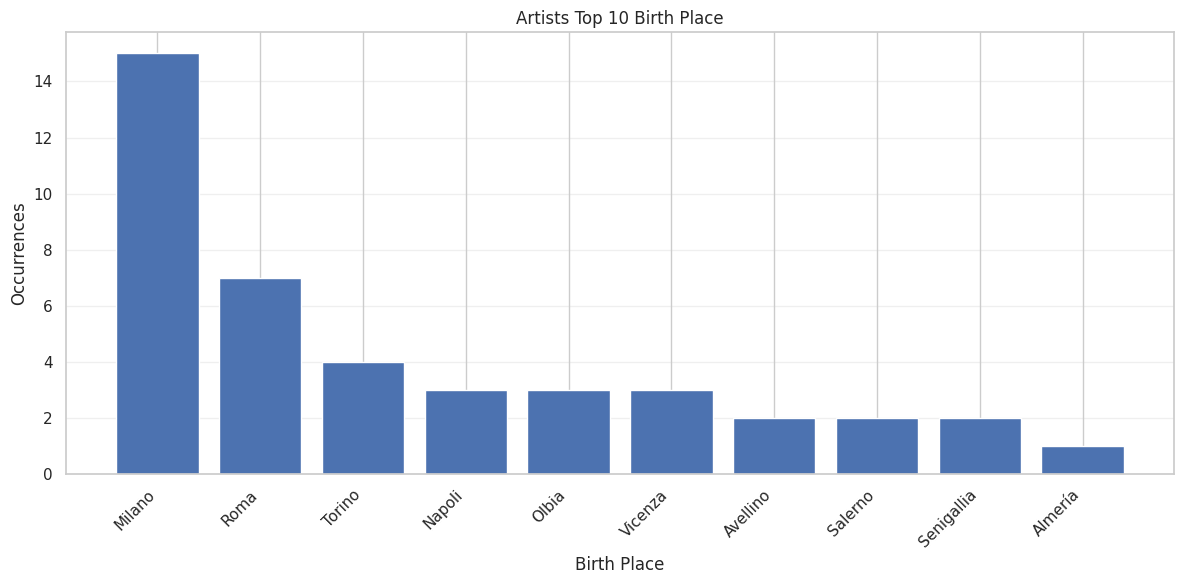

In [ ]:
# Birth places distribution
birth_places = artists['birth_place'].value_counts().head(10)
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(birth_places)), birth_places.values)
plt.xticks(range(len(birth_places)), birth_places.index, rotation=45, ha='right')
plt.xlabel('Birth Place')
plt.ylabel('Occurrences')
plt.title('Artists Top 10 Birth Place')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

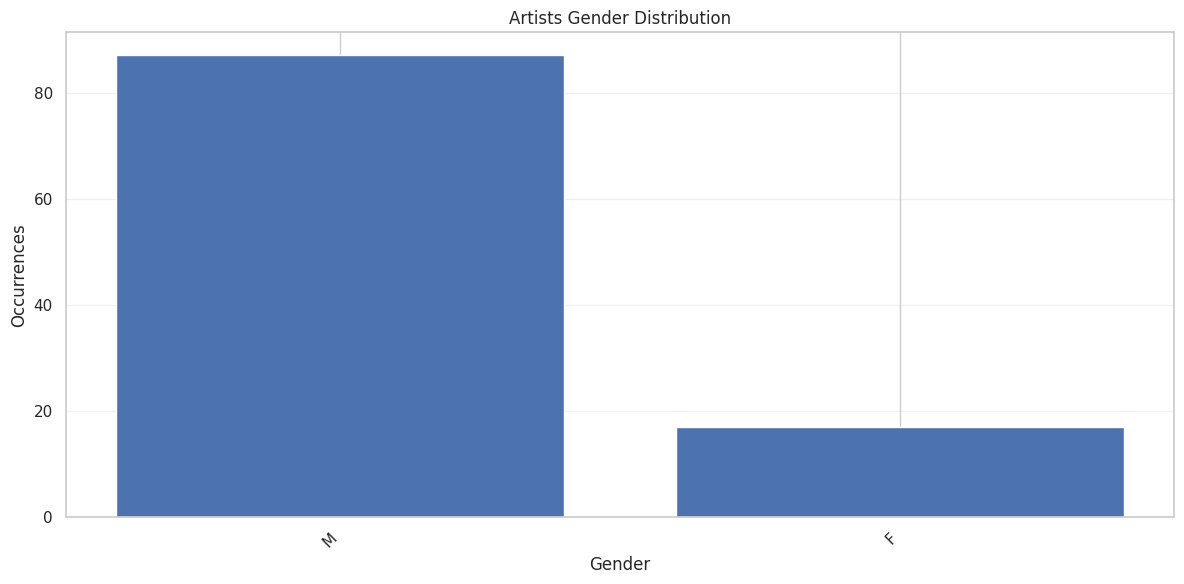

In [ ]:
# gender distribution
gender = artists['gender'].value_counts()
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(gender)), gender.values)
plt.xticks(range(len(gender)), gender.index, rotation=45, ha='right')
plt.xlabel('Gender')
plt.ylabel('Occurrences')
plt.title('Artists Gender Distribution')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

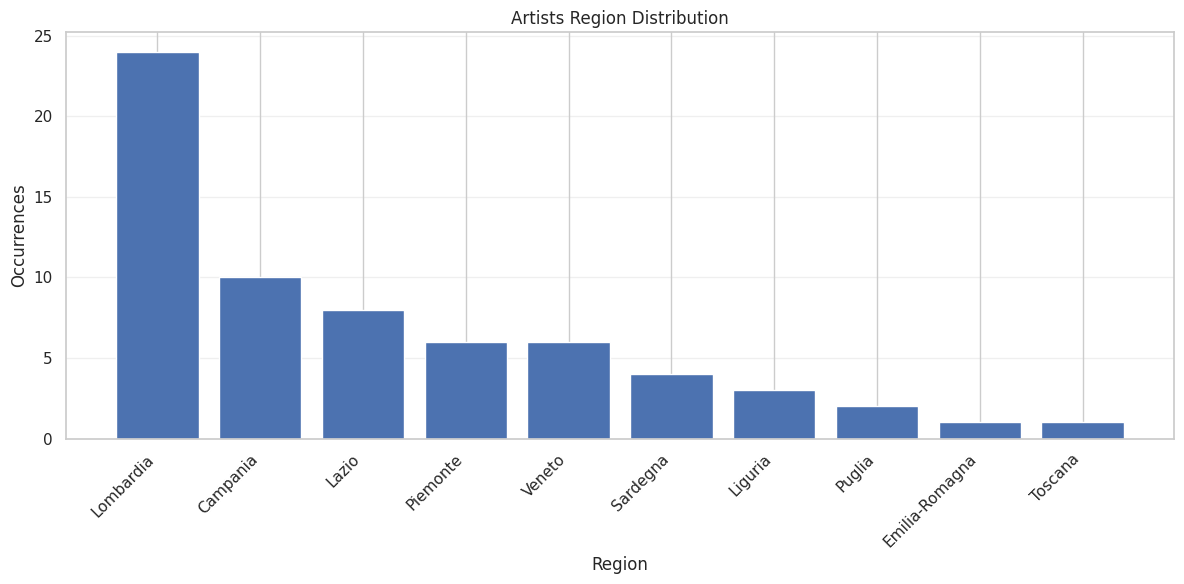

In [ ]:
# region distribution
regions = artists['region'].value_counts().head(10)
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(regions)), regions.values)
plt.xticks(range(len(regions)), regions.index, rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Occurrences')
plt.title('Artists Region Distribution')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

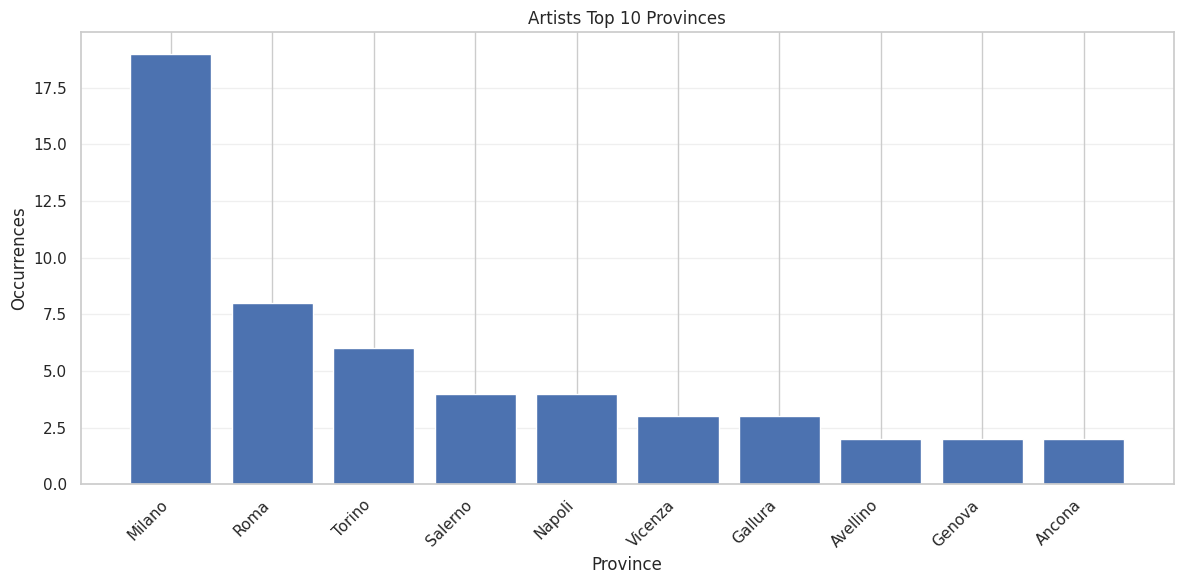

In [ ]:
# province distribution
province = artists['province'].value_counts().head(10)
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(province)), province.values)
plt.xticks(range(len(province)), province.index, rotation=45, ha='right')
plt.xlabel('Province')
plt.ylabel('Occurrences')
plt.title('Artists Top 10 Provinces')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

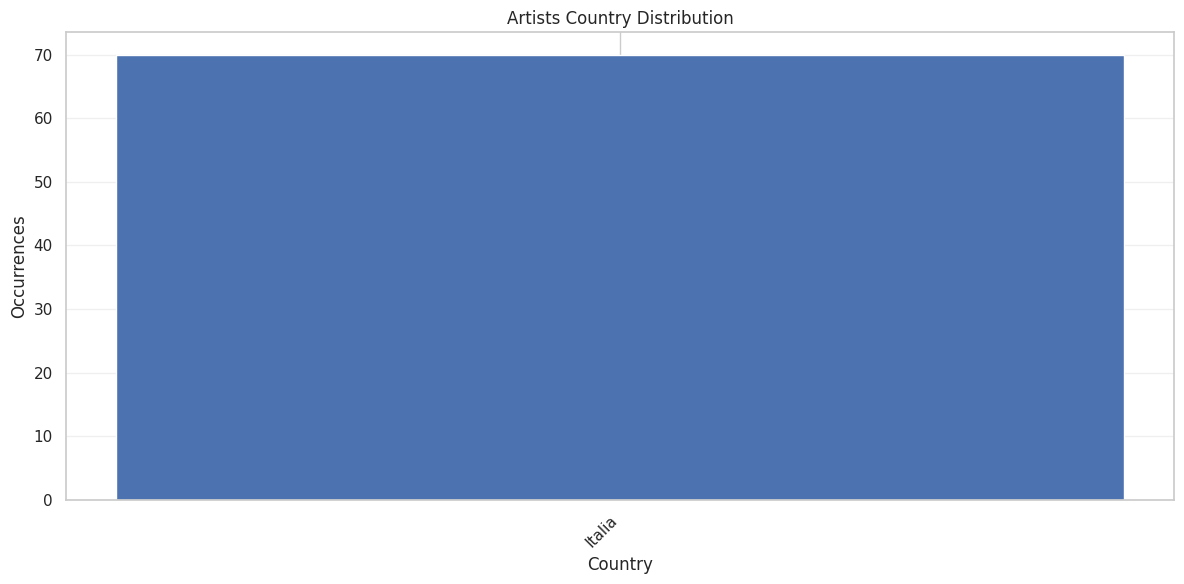

In [ ]:
# countries distribution
countries = artists['country'].value_counts()
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(countries)), countries.values)
plt.xticks(range(len(countries)), countries.index, rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Occurrences')
plt.title('Artists Country Distribution')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

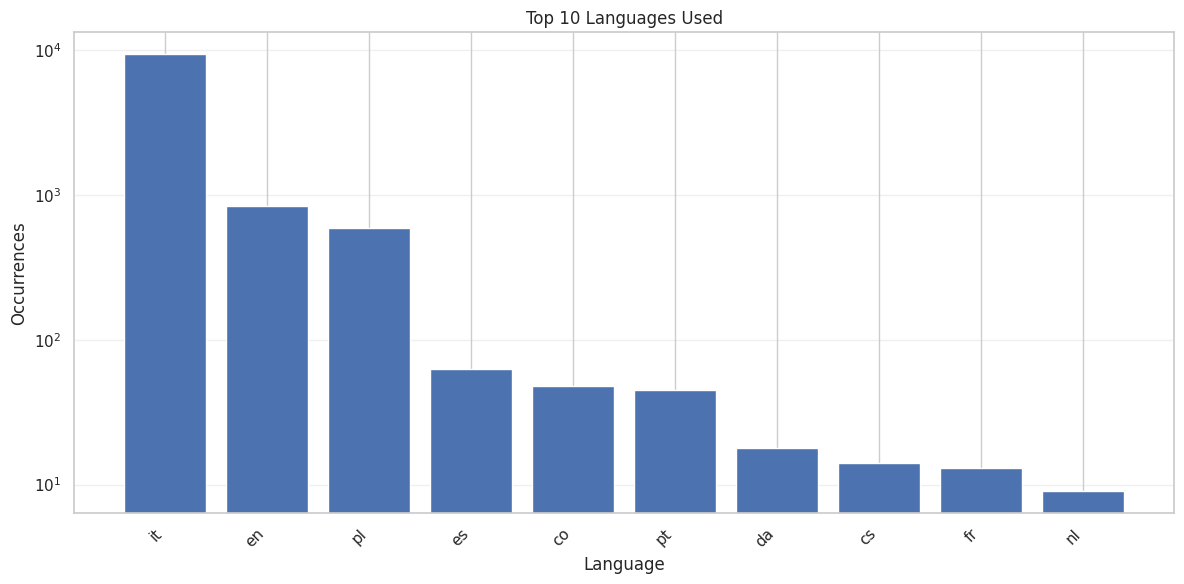

In [ ]:
# Most used language
lang_counts = tracks['language'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(range(len(lang_counts)), lang_counts.values)
plt.xticks(range(len(lang_counts)), lang_counts.index, rotation=45, ha='right')
plt.xlabel('Language')
plt.ylabel('Occurrences')
plt.yscale('log') 
plt.title('Top 10 Languages Used')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# let's first see some upper and lower bounds for popularity
print(f"Max popularity value: {tracks['popularity'].max()}")
print(f"Min popularity value: {tracks['popularity'].min()}")
print(f"Mean popularity: {tracks['popularity'].mean()}")
print(f"Median popularity: {tracks['popularity'].median()}")
print(f"Italian swear words [Max - Mean]: [{tracks['swear_IT'].max()} - {tracks['swear_IT'].mean():.2f}]")
print(f"English swear words [Max - Mean]: [{tracks['swear_EN'].max()} - {tracks['swear_EN'].mean():.2f}]")

Max popularity value: 993842
Min popularity value: -954
Mean popularity: 855.5701715004041
Median popularity: 32.0
Italian swear words [Max - Mean]: [72 - 2.34]
English swear words [Max - Mean]: [72 - 0.71]


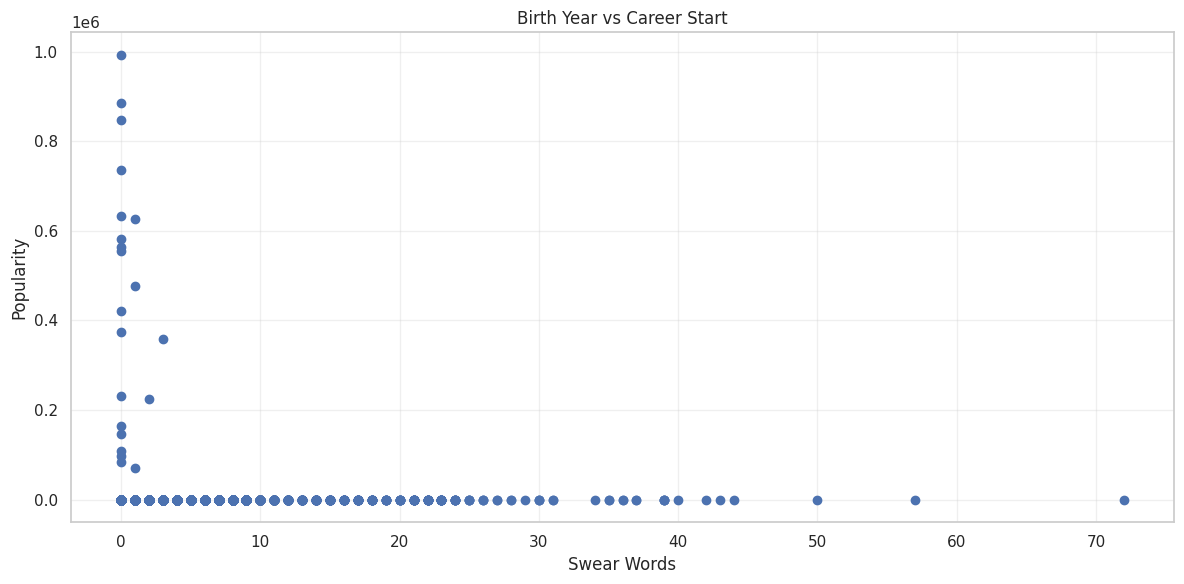

In [ ]:
# We can see that there are some odd values for popularity to explore, minimum value seems odd, same for max value which is very high, let's plot a distribution of popularity values
# we can observe that around 3x more italian swear words are used compared to english, this was expected as we are analyzing italian rap
# additionally we can see a low usage of swear words
plt.figure(figsize=(12, 6))
plt.scatter(tracks['swear_IT'], tracks['popularity'])
plt.xlabel('Swear Words')
plt.ylabel('Popularity')
plt.title('Birth Year vs Career Start')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

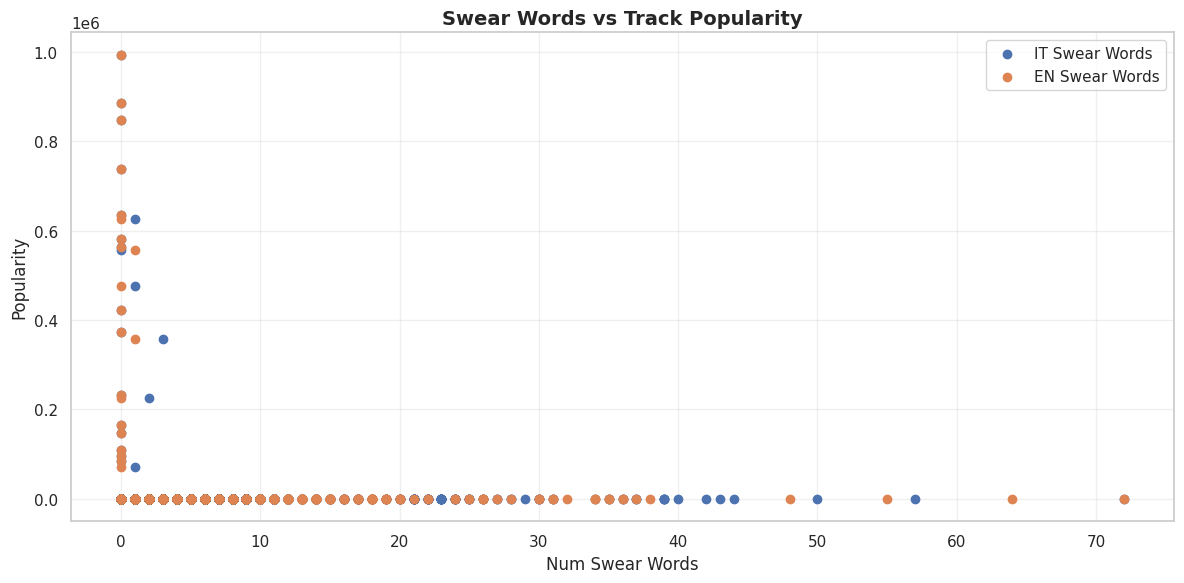

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(tracks['swear_IT'], tracks['popularity'], label='IT Swear Words')
plt.scatter(tracks['swear_EN'], tracks['popularity'], label='EN Swear Words')
plt.xlabel('Num Swear Words', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Swear Words vs Track Popularity', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

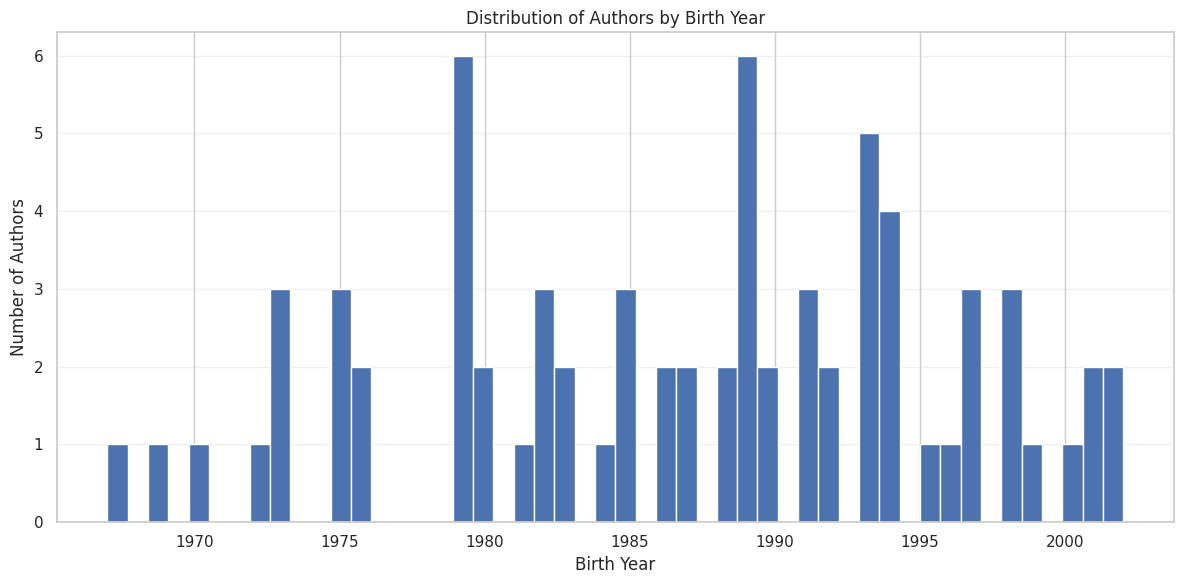

In [ ]:
artists['birth_year'] = pd.to_datetime(artists['birth_date'], errors='coerce').dt.year
plt.figure(figsize=(12, 6))
plt.hist(artists['birth_year'].dropna(), bins=50)
plt.xlabel('Birth Year')
plt.ylabel('Number of Authors')
plt.title('Distribution of Authors by Birth Year')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

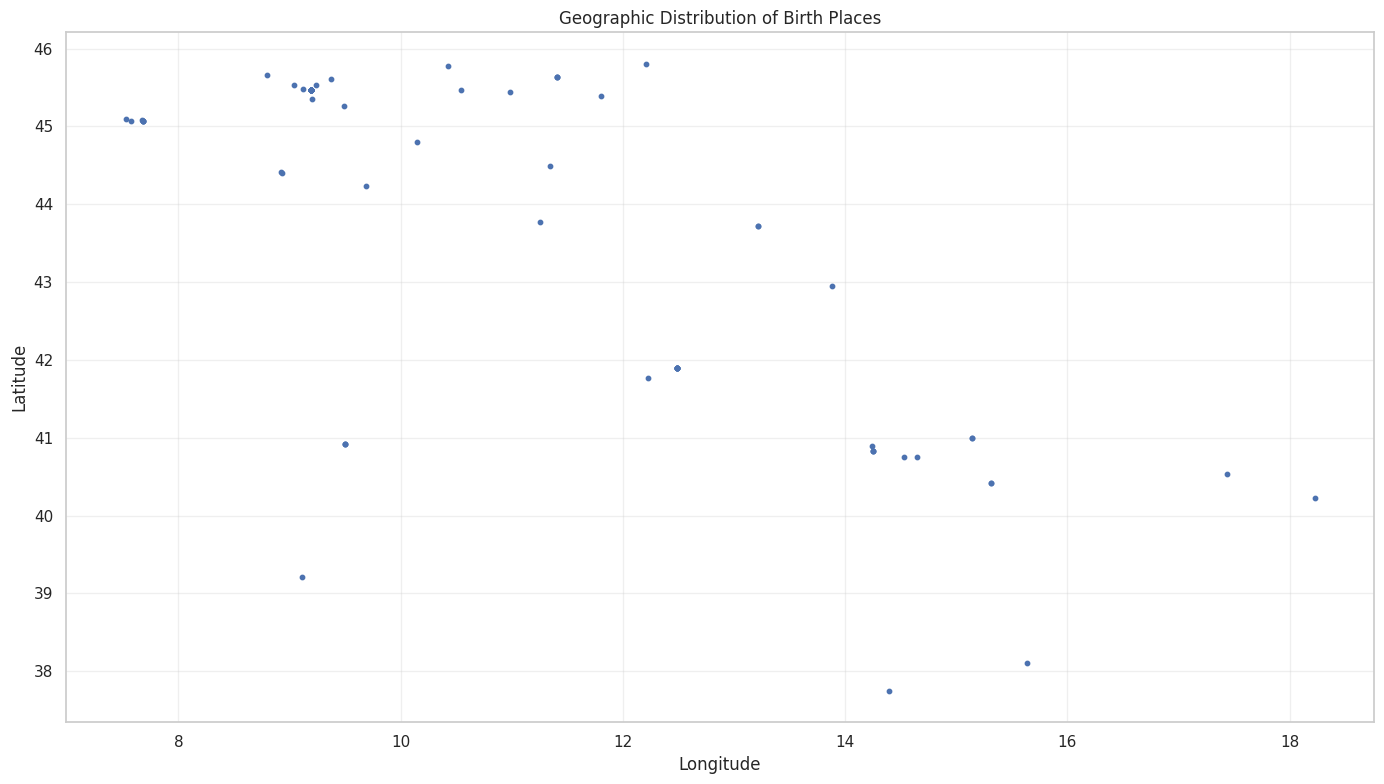

In [ ]:
# We can see the map which resembles italy, partially
plt.figure(figsize=(14, 8))
plt.scatter(artists['longitude'], artists['latitude'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Birth Places')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

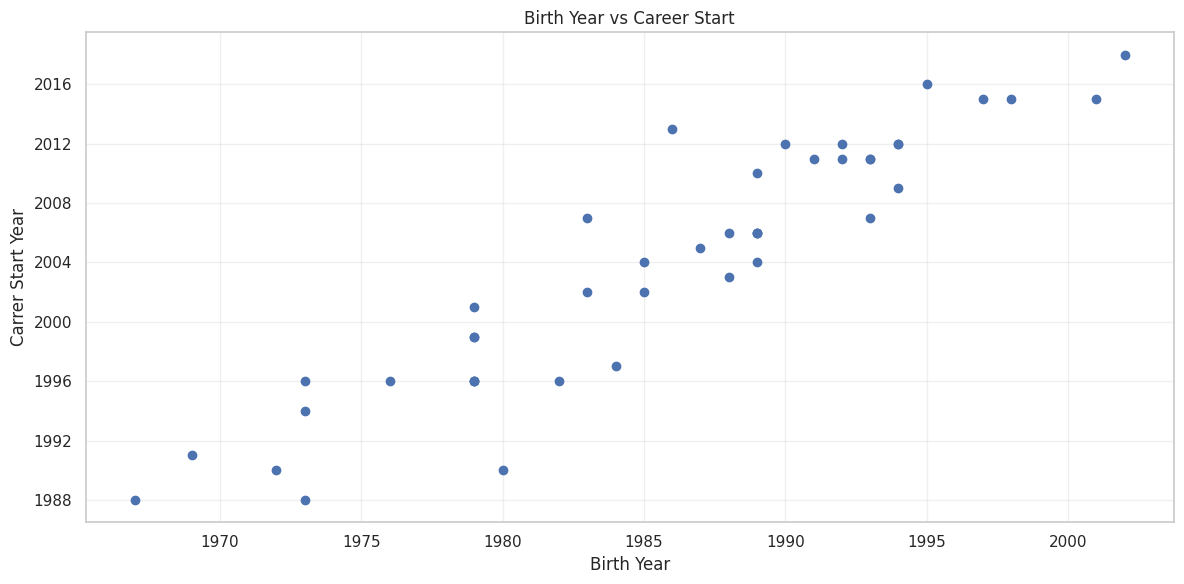

In [ ]:
# We can see some expected correlation between birth year and activity start
plt.figure(figsize=(12, 6))
plt.scatter(artists['birth_year'], artists['active_start'])
plt.xlabel('Birth Year')
plt.ylabel('Carrer Start Year')
plt.title('Birth Year vs Career Start')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

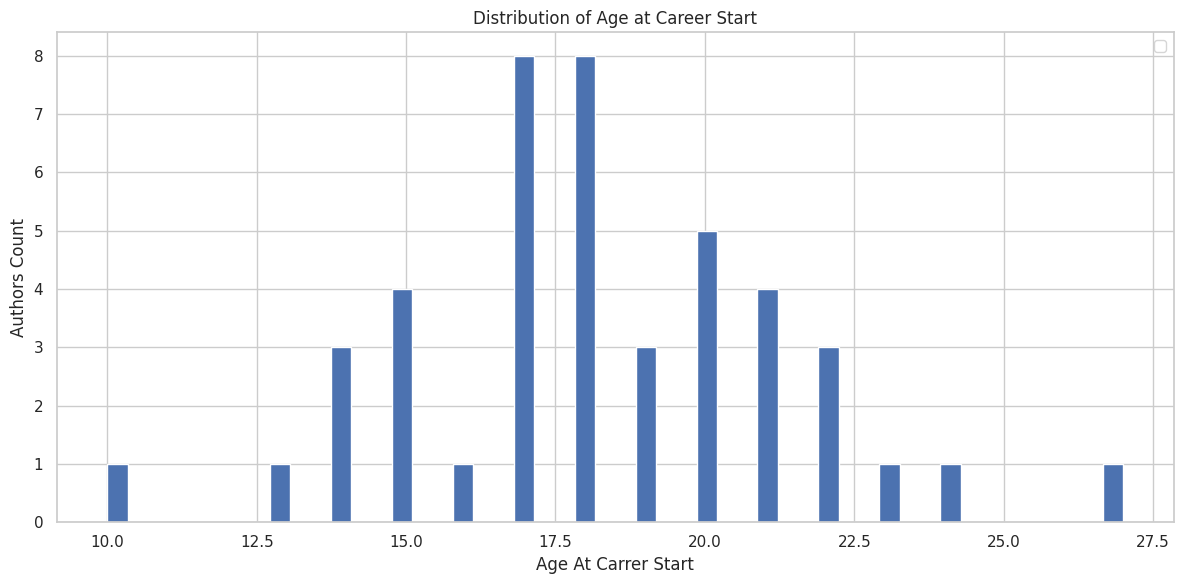

Mean age at start: 18.23
Median age at start: 18.00
Std dev: 3.17


In [ ]:
# let's see stats on starting carrer age
artists['active_start_year'] = pd.to_datetime(artists['active_start'], errors='coerce').dt.year
artists['age_at_start'] = artists['active_start_year'] - artists['birth_year']

plt.figure(figsize=(12, 6))
plt.hist(artists['age_at_start'].dropna(), bins=50)
plt.xlabel('Age At Carrer Start')
plt.ylabel('Authors Count')
plt.title('Distribution of Age at Career Start')
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean age at start: {artists['age_at_start'].mean():.2f}")
print(f"Median age at start: {artists['age_at_start'].median():.2f}")
print(f"Std dev: {artists['age_at_start'].std():.2f}")